In [1]:
import xarray as xr
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

from collections import namedtuple
from shapely import geometry

import scipy 
from scipy import signal


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, matplotlib, xarray, cartopy, scipy

Software versions
Python 3.11.10 64bit [Clang 17.0.6 ]
IPython 8.29.0
OS macOS 15.7 x86_64 i386 64bit
numpy 2.1.3
matplotlib 3.9.2
xarray 2024.10.0
cartopy 0.24.0
scipy 1.14.1
Wed Feb 04 17:27:43 2026 CET

In [3]:
filedir = '/Volumes/LaCie/UU_machines/gemini/data/output_data/data_Laura/outputs_parcels/Azores/eNATL60/'

In [4]:
ds_nT_Dec_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1201_hourly_MONTH.nc')
ds_wT_Dec_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1201_hourly_MONTH.nc')

ds_nT_Jan_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0101_hourly_MONTH.nc')
ds_wT_Jan_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0101_hourly_MONTH.nc')

ds_nT_Feb_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0201_hourly_MONTH.nc')
ds_wT_Feb_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0201_hourly_MONTH.nc')


In [5]:
ds_nT_Mar_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0301_hourly_MONTH.nc')
ds_wT_Mar_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0301_hourly_MONTH.nc')

ds_nT_Apr_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0401_hourly_MONTH.nc')
ds_wT_Apr_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0401_hourly_MONTH.nc')

ds_nT_May_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0501_hourly_MONTH.nc')
ds_wT_May_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0501_hourly_MONTH.nc')


In [6]:
ds_nT_Jun_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0601_hourly_MONTH.nc')
ds_wT_Jun_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0601_hourly_MONTH.nc')

ds_nT_Jul_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0701_hourly_MONTH.nc')
ds_wT_Jul_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0701_hourly_MONTH.nc')

ds_nT_Aug_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0801_hourly_MONTH.nc')
ds_wT_Aug_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0801_hourly_MONTH.nc')


In [7]:
ds_nT_Sep_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0901_hourly_MONTH.nc')
ds_wT_Sep_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0901_hourly_MONTH.nc')

ds_nT_Oct_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1001_hourly_MONTH.nc')
ds_wT_Oct_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1001_hourly_MONTH.nc')

ds_nT_Nov_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1101_hourly_MONTH.nc')
ds_wT_Nov_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1101_hourly_MONTH.nc')


In [8]:
def rem_nans(ds):
    """
    This renders lon and lat variables without nans for the last timestep.
    """
    bad_indices = np.isnan(ds['lon'][:,-1]) | np.isnan(ds['lat'][:,-1])
    good_indices = ~bad_indices
    lon_end_nonans = ds['lon'][:,-1][good_indices]
    lat_end_nonans = ds['lat'][:,-1][good_indices]
    
    return lon_end_nonans, lat_end_nonans

In [9]:
def plot_particles(dsp, axn, ntitle, ntime=-1, splot='end'):
    """
    -ntime: timestep of parcels simu, last timestep (-1) by default
    splot: (end by default)
    - end : end distribution of particles
    -hist2d : 2d histogram of end distribution of particles
    """
    axn.coastlines(resolution='50m', color='black', linewidth=1, zorder=50)
    axn.add_feature(cartopy.feature.LAND, facecolor='burlywood', zorder=20) 
    
    ######
    # Title
    if ntitle in ntitles[0:6]:
        nyear = '2009'
    elif ntitle in ntitles[6::]:
        nyear = '2010'
    else:
        print('Error nyear')
        dgdsgsg
        
    strtitle = ntitle + ' ' + nyear
    axn.set_title(strtitle, size=16)
    ######
    
    if splot == 'end':
        axn.set_xlim([-35,-18])
        axn.set_ylim([30,40])
        axn.scatter(dsp['lon'][:, ntime], dsp['lat'][:,ntime], s=.01, transform=ccrs.PlateCarree()) #marker='o'
  
        axn.set_xticks([-35, -30., -25., -20.], crs=ccrs.PlateCarree())
        axn.set_yticks([30., 33., 36., 39.],crs=ccrs.PlateCarree())
    
    elif splot == 'hist2d':
        lon_end_nonans, lat_end_nonans = rem_nans(dsp, ntime)
        cc = axn.hist2d(lon_end_nonans, lat_end_nonans, bins=nbins, range=((xmin, xmax), (ymin, ymax)), vmin=vmin, vmax=vmax)
        axn.set_xticks([-26, -24., -22.], crs=ccrs.PlateCarree())
        axn.set_yticks([33., 35.],crs=ccrs.PlateCarree())

        return cc


In [24]:
ntitles = ['Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.'] # order by OGCM months


In [11]:
dsps_nT = [ds_nT_Jul_month,
ds_nT_Aug_month,
ds_nT_Sep_month,
ds_nT_Oct_month,
ds_nT_Nov_month,
ds_nT_Dec_month,
ds_nT_Jan_month,
ds_nT_Feb_month,
ds_nT_Mar_month,
ds_nT_Apr_month,
ds_nT_May_month,
ds_nT_Jun_month]

In [12]:
dsps_wT = [ds_wT_Jul_month,
ds_wT_Aug_month,
ds_wT_Sep_month,
ds_wT_Oct_month,
ds_wT_Nov_month,
ds_wT_Dec_month,
ds_wT_Jan_month,
ds_wT_Feb_month,
ds_wT_Mar_month,
ds_wT_Apr_month,
ds_wT_May_month,
ds_wT_Jun_month]

In [13]:

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=.5)


# Subregion selected:

In [14]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

subregion =  Region(
        region_name="Azores_subregion",
        lonmin=-27., 
        lonmax=-21., 
        latmin=32.5, 
        latmax=36.5
)

In [15]:
geom = geometry.box(minx=subregion.lonmin,maxx=subregion.lonmax,miny=subregion.latmin,maxy=subregion.latmax)

# Getting the particles at the border of the initial distribution:

In [16]:
step = .04 # degrees
grid_lons, grid_lats = np.meshgrid(np.arange(-35, -18+step, step), np.arange(30, 40+step, step))


In [17]:
ds = dsps_nT[0] # Using a test dataset to find the indices (will be the same for all months)

trajs_ind_2d = np.reshape(ds.traj.data, (grid_lons.shape[0], grid_lons.shape[1]) )

In [18]:
trajs_ind_2d_borders = np.hstack((trajs_ind_2d[0,:], trajs_ind_2d[-1,:], trajs_ind_2d[:,0], trajs_ind_2d[:,-1]))

# Skewness time evolution:

## Skewness data generated at:
http://localhost:8888/notebooks/Azores/2021-02-22_Azores_simus_100000p_hists_MONTHLY_allMONTHS_subregion_v02_SKEWNESS.ipynb#

In [20]:
skew_data = np.load('../Calculations/skew_2D_months_subregion_v02.npz')
skw_2D_intime_nT = skew_data['skw_2D_intime_nT']
skw_2D_intime_wT = skew_data['skw_2D_intime_wT']

In [21]:
props = dict(boxstyle='round', facecolor='wheat', alpha=1.)

# Skewness end bar plot:

In [26]:
width = 0.35  # the width of the bars
labels = ['Jul. 2009', 'Aug. 2009', 'Sep. 2009', 'Oct. 2009', 'Nov. 2009', 'Dec. 2009', 'Jan. 2010', 'Feb. 2010', 'Mar. 2010', 'Apr. 2010', 'May 2010', 'Jun. 2010'] # order by OGCM months
x = np.arange(len(labels))  # the label locations

# Bar plot using border indices:

In [23]:
nyears_nmonths = ['2009-07-', '2009-08-', '2009-09-', '2009-10-', '2009-11-', '2009-12-', '2010-01-', '2010-02-', '2010-03-', '2010-04-', '2010-05-', '2010-06-']

%%%%%%%
0
2009-07-29T00:30:00.000000000
%%%%%%%
%%%%%%%
1
2009-08-29T00:30:00.000000000
%%%%%%%
%%%%%%%
2
2009-09-29T00:30:00.000000000
%%%%%%%
%%%%%%%
3
2009-10-29T00:30:00.000000000
%%%%%%%
%%%%%%%
4
2009-11-29T00:30:00.000000000
%%%%%%%
%%%%%%%
5
2009-12-29T00:30:00.000000000
%%%%%%%
%%%%%%%
6
2010-01-29T00:30:00.000000000
%%%%%%%
%%%%%%%
7
2010-02-28T00:30:00.000000000
%%%%%%%
%%%%%%%
8
2010-03-29T00:30:00.000000000
%%%%%%%
%%%%%%%
9
2010-04-29T00:30:00.000000000
%%%%%%%
%%%%%%%
10
2010-05-29T00:30:00.000000000
%%%%%%%
%%%%%%%
11
2010-06-29T00:30:00.000000000
%%%%%%%


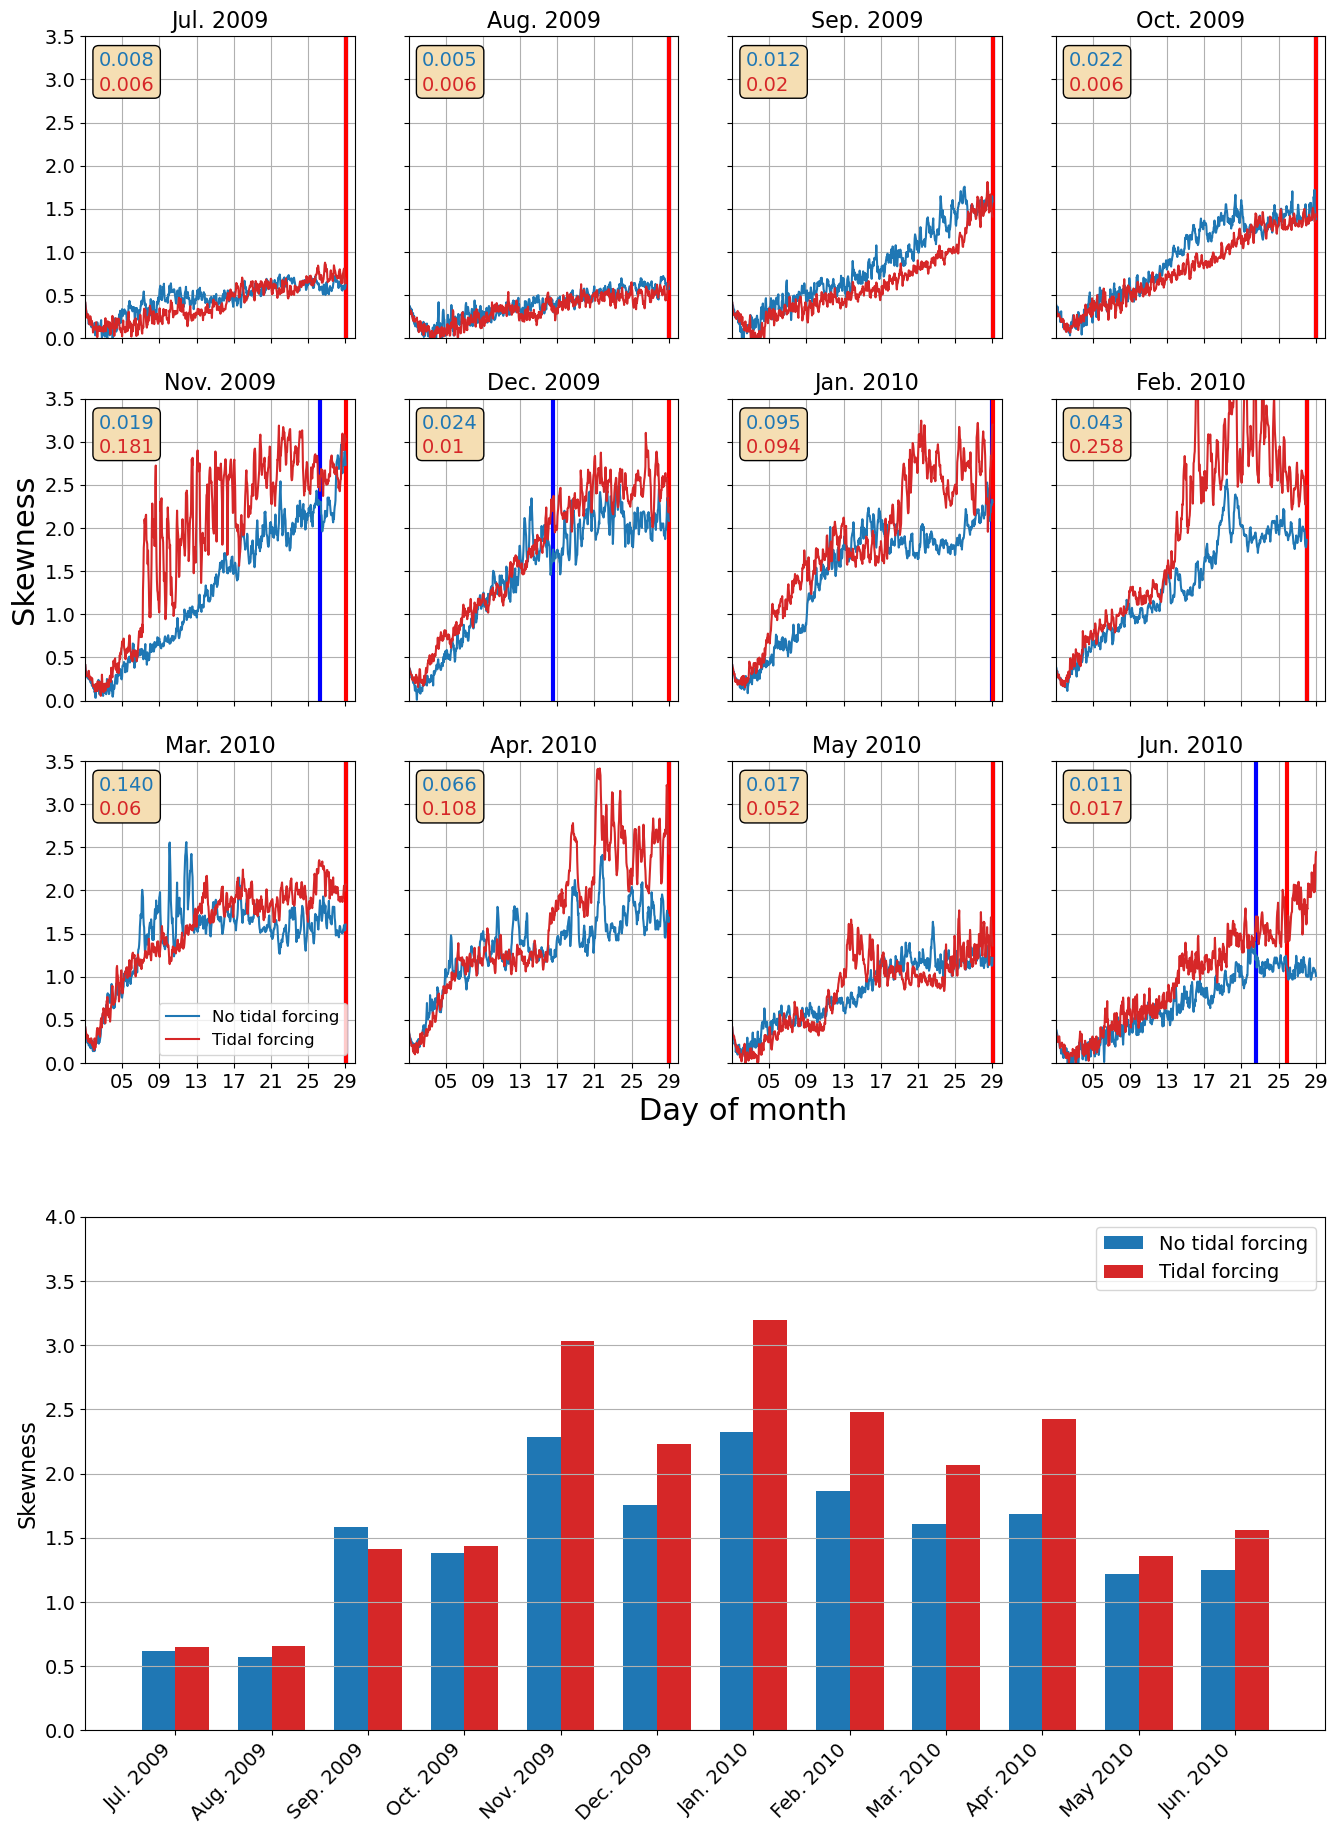

In [28]:
# 50055 is a random trajectory number that has no nans

fig = plt.figure(figsize=(16,22)) #(17,5)

gs = gridspec.GridSpec(2, 1, height_ratios=[.66, .33]) #, .01])

gs00 = gs[0].subgridspec(3, 4)

for ii in range(0, len(ntitles)):
    ax1 = plt.subplot(gs00[ii])
    
    ####
    ## Indices when particle from border enters black box (subdomain)
    # Non-tidal
    ind_2d_borders_T = (np.where((dsps_nT[ii]['lon'][trajs_ind_2d_borders, :] > subregion.lonmin) 
             & (dsps_nT[ii]['lon'][trajs_ind_2d_borders, :] < subregion.lonmax)
             & (dsps_nT[ii]['lat'][trajs_ind_2d_borders, :] > subregion.latmin)
             & (dsps_nT[ii]['lat'][trajs_ind_2d_borders, :] < subregion.latmax))[1])
    if ind_2d_borders_T.size == 0.:
        ind_2d_borders_T_min_nT = dsps_wT[ii]['lon'].shape[1]
    else :
        ind_2d_borders_T_min_nT = np.min(ind_2d_borders_T)
        
    # Tidal
    ind_2d_borders_T = (np.where((dsps_wT[ii]['lon'][trajs_ind_2d_borders, :] > subregion.lonmin) 
             & (dsps_wT[ii]['lon'][trajs_ind_2d_borders, :] < subregion.lonmax)
             & (dsps_wT[ii]['lat'][trajs_ind_2d_borders, :] > subregion.latmin)
             & (dsps_wT[ii]['lat'][trajs_ind_2d_borders, :] < subregion.latmax))[1])
    if ind_2d_borders_T.size == 0.:
        ind_2d_borders_T_min_wT = dsps_wT[ii]['lon'].shape[1]
    else :
        ind_2d_borders_T_min_wT = np.min(ind_2d_borders_T)   
        
    ####
    # Plot vertical black line
    ax1.axvline(dsps_nT[ii].time[50055,0:ind_2d_borders_T_min_nT].data.max(), color='blue', linewidth=3)
    ax1.axvline(dsps_nT[ii].time[50055,0:ind_2d_borders_T_min_wT].data.max(), color='red', linewidth=3)
    
    ####
    
    if ii == 7: # Feb dimension mismatch problem
        ax1.plot(dsps_nT[ii].time[50055,:].data, skw_2D_intime_nT[ii,0:649], '-', color='C0', label='No tidal forcing') # 0:649 , after 649 values are nan (one day less in february
        ax1.plot(dsps_nT[ii].time[50055,:].data, skw_2D_intime_wT[ii,0:649], '-', color='C3', label='Tides')
        xmax = np.datetime64(nyears_nmonths[ii+1] + '02' + 'T00:30:00') # 2 of march so that 2 extra days, and same margin as other months (same xscale)
    else:
        ax1.plot(dsps_nT[ii].time[50055,:].data, skw_2D_intime_nT[ii,:], '-', color='C0', label='No tidal forcing')
        ax1.plot(dsps_nT[ii].time[50055,:].data, skw_2D_intime_wT[ii,:], '-', color='C3', label='Tidal forcing')
        xmax = np.datetime64(nyears_nmonths[ii] + '30' + 'T00:30:00')
        
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d')) # %Y-%m
    ax1.grid()
    ax1.set_ylim([0, 3.5])    
    ##
    print('%%%%%%%')
    print(ii)
    print(dsps_nT[ii].time[50055,-1].data)
    print('%%%%%%%')
    ##
    ax1.set_xlim([(dsps_nT[ii].time[50055,0].data), xmax]) #(dsps_nT[ii].time[50055,-1].data)])
    ax1.tick_params(axis='both', which='major', labelsize=14)

    ##
    ######
    # Title
    if ntitles[ii] in ntitles[0:6]:
        nyear = '2009'
    elif ntitles[ii] in ntitles[6::]:
        nyear = '2010'
    else:
        print('Error nyear')
        dgdsgsg
        
    strtitle = ntitles[ii] + ' ' + nyear
    ax1.set_title(strtitle, size=16)
    ######
    # Legend
    if ii == 8:
        ax1.legend(fontsize=12, loc=4)
    if (  (ii==4)  ):
        ax1.set_ylabel('Skewness', size=22)    
    if ii==9:
        ax1.set_xlabel('                                         Day of month', size=22)    
    if ii<8 :
        ax1.axes.xaxis.set_ticklabels([])
    if (ii != 0) & (ii != 4) & (ii != 8) :
        ax1.axes.yaxis.set_ticklabels([])
    
    # Variance:
    varn = np.round(np.nanvar(signal.detrend(skw_2D_intime_nT[ii,0:ind_2d_borders_T_min_nT])), 3)
    varw = np.round(np.nanvar(signal.detrend(skw_2D_intime_wT[ii,0:ind_2d_borders_T_min_nT])), 3)
    skew_text = str(varn).ljust(5, '0') + '\n '
    ax1.text(0.05, 0.95, skew_text, transform=ax1.transAxes, fontsize=14,
       verticalalignment='top', c='C0', bbox=props) #0.75, 0.25
    #     ax1.text(0.75, 0.25, str(varn), transform=ax1.transAxes, fontsize=14,
    #        verticalalignment='top', c='b') #, bbox=props)
    skew_text = str(varw) + '\n '
    ax1.text(0.05, 0.87, str(varw), transform=ax1.transAxes, fontsize=14,
       verticalalignment='top', c='C3')#, bbox=props) #0.75, 0.15

################
################
################
# Bar plots
axb = plt.subplot(gs[1])

for ii in range(0, len(ntitles)):

    ####
    ## Indices when particle from border enters black box (subdomain)
    # Non-tidal
    ind_2d_borders_T = (np.where((dsps_nT[ii]['lon'][trajs_ind_2d_borders, :] > subregion.lonmin) 
             & (dsps_nT[ii]['lon'][trajs_ind_2d_borders, :] < subregion.lonmax)
             & (dsps_nT[ii]['lat'][trajs_ind_2d_borders, :] > subregion.latmin)
             & (dsps_nT[ii]['lat'][trajs_ind_2d_borders, :] < subregion.latmax))[1])
    if ind_2d_borders_T.size == 0.:
        ind_2d_borders_T_min_nT = dsps_wT[ii]['lon'].shape[1]
    else :
        ind_2d_borders_T_min_nT = np.min(ind_2d_borders_T)

    # Tidal
    ind_2d_borders_T = (np.where((dsps_wT[ii]['lon'][trajs_ind_2d_borders, :] > subregion.lonmin) 
             & (dsps_wT[ii]['lon'][trajs_ind_2d_borders, :] < subregion.lonmax)
             & (dsps_wT[ii]['lat'][trajs_ind_2d_borders, :] > subregion.latmin)
             & (dsps_wT[ii]['lat'][trajs_ind_2d_borders, :] < subregion.latmax))[1])
    if ind_2d_borders_T.size == 0.:
        ind_2d_borders_T_min_wT = dsps_wT[ii]['lon'].shape[1]
    else :
        ind_2d_borders_T_min_wT = np.min(ind_2d_borders_T)   
    
    if ii == 0:
        axb.bar(x[ii] - width/2, skw_2D_intime_nT[ii,ind_2d_borders_T_min_nT-1], width, label='No tidal forcing', color='C0')
        axb.bar(x[ii] + width/2, skw_2D_intime_wT[ii,ind_2d_borders_T_min_wT-1], width, label='Tidal forcing', color='C3')

    else:
        axb.bar(x[ii] - width/2, skw_2D_intime_nT[ii,ind_2d_borders_T_min_nT-1], width, color='C0')
        axb.bar(x[ii] + width/2, skw_2D_intime_wT[ii,ind_2d_borders_T_min_wT-1], width, color='C3')

axb.tick_params(axis='both', which='major', labelsize=14)
axb.set_xticks(x)
axb.set_xticklabels(labels, rotation=45, horizontalalignment='right', size=14)
axb.legend(fontsize=14)
axb.set_ylim([0, 4])
axb.grid(axis='y')
axb.set_ylabel('Skewness', size=16)

################
################
################

plt.savefig('../../Figures/' + 'skewness_intime_border_nT_wT_monthly_v02_wBARS.jpg', dpi=300)

plt.show()